In [19]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.io import loadmat
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator


def preprocess_image(image_path, target_size):
    """Preprocesses an image by resizing and normalizing it."""
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = img_to_array(image)
    image_array /= 255.0
    return image_array


def load_and_preprocess_images(image_folder, image_ids, labels, target_size):
    """Loads and preprocesses images from a folder."""
    images = []
    image_labels = []
    for image_id in image_ids:
        image_path = os.path.join(image_folder, f'image_{image_id + 1:05d}.jpg')
        if os.path.exists(image_path):
            image_array = preprocess_image(image_path, target_size)
            images.append(image_array)
            image_labels.append(labels[image_id])
        else:
            print(f"Image file not found: {image_path}")
    return np.array(images), np.array(image_labels)


In [20]:
def preprocess_image(image_path, target_size):
    """Preprocesses an image by resizing and normalizing it."""
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = img_to_array(image)
    image_array /= 255.0
    return image_array


In [5]:
import os
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
import numpy as np

# Directory containing the flower images
image_folder = '102flowers'

# Get a list of all image file paths in the directory
image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.jpg')]

# Randomly select an image file
random_image_path = random.choice(image_files)

# Load the randomly selected image
sample_image = Image.open(random_image_path)
sample_image_array = img_to_array(sample_image)

# Now you can proceed with data augmentation or any other processing with the random sample image

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2, # Shift images vertically by up to 20% of the height
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Zoom in/out on images by up to 20%
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=True,     # Flip images vertically
    fill_mode='nearest'     # Strategy for filling in newly created pixels
)

# Reshape the image array to (1, height, width, channels) for the generator
sample_image_array = np.expand_dims(sample_image_array, axis=0)

# Generate augmented images
num_augmented_images = 5
for i, augmented_image_array in enumerate(datagen.flow(sample_image_array, batch_size=1)):
    augmented_image = Image.fromarray(np.uint8(augmented_image_array[0]))
    augmented_image.save(f'augmented_image_{i+1}.jpg')  # Save augmented image
    if i + 1 == num_augmented_images:
        break  # Stop after generating the specified number of augmented images


In [16]:
import os
import numpy as np
from PIL import Image

def load_and_preprocess_images(image_folder, segmentation_folder, image_ids, target_size):
    images = []
    segmentations = []
    for image_id in image_ids:
        # Load flower image
        image_path = os.path.join(image_folder, f'image_{image_id + 1:05d}.jpg')
        if os.path.exists(image_path):
            image = Image.open(image_path)
            image = image.resize(target_size)
            image_array = np.array(image, dtype=np.float32)  # Convert to float32
            image_array /= 255.0
            images.append(image_array)
        else:
            print(f"Image file not found: {image_path}")
            continue
        
        # Load segmentation mask
        segmentation_path = os.path.join(segmentation_folder, f'segmim_{image_id + 1:05d}.jpg')
        if os.path.exists(segmentation_path):
            segmentation = Image.open(segmentation_path)
            segmentation = segmentation.resize(target_size)
            segmentation_array = np.array(segmentation, dtype=np.float32)  # Convert to float32
            segmentation_array = np.expand_dims(segmentation_array[:, :, 0], axis=-1)  # Consider only one channel
            segmentation_array /= 255.0
            segmentations.append(segmentation_array)
        else:
            print(f"Segmentation mask file not found: {segmentation_path}")
            segmentations.append(np.zeros((target_size[0], target_size[1], 1), dtype=np.float32))  # Append zeros if mask not found
    
    return np.array(images), np.array(segmentations)


In [17]:
# Define preprocessing parameters
target_size = (224, 224)

# Preprocess training images and segmentation masks
train_images, train_segmentations = load_and_preprocess_images(image_folder, segmentation_folder, train_ids, target_size)

# Preprocess validation images and segmentation masks
val_images, val_segmentations = load_and_preprocess_images(image_folder, segmentation_folder, val_ids, target_size)

# Preprocess testing images and segmentation masks
test_images, test_segmentations = load_and_preprocess_images(image_folder, segmentation_folder, test_ids, target_size)


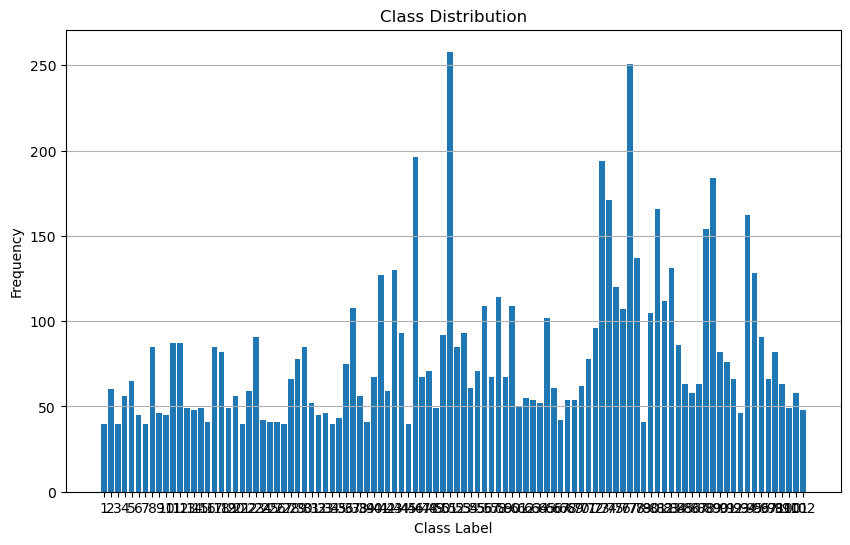

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Class Distribution
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Visualize Class Distribution
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, label_counts)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.xticks(unique_labels)
plt.grid(axis='y')
plt.show()


In [7]:
from scipy.io import loadmat

# Load the imagelabels.mat file
label_data = loadmat('imagelabels.mat')

# Access the labels array
labels = label_data['labels'][0]

# Print the labels
print("Labels:", labels)

# Optionally, print the number of unique labels/categories
num_unique_labels = len(set(labels))
print("Number of unique labels:", num_unique_labels)

# Optionally, print some sample labels to get an idea
print("Sample labels:", labels[:10])  # Print the first 10 labels


Labels: [77 77 77 ... 62 62 62]
Number of unique labels: 102
Sample labels: [77 77 77 77 77 77 77 77 77 77]


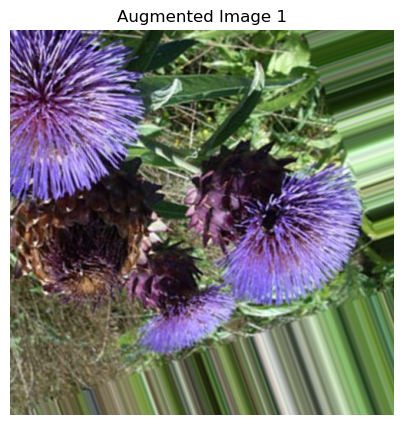

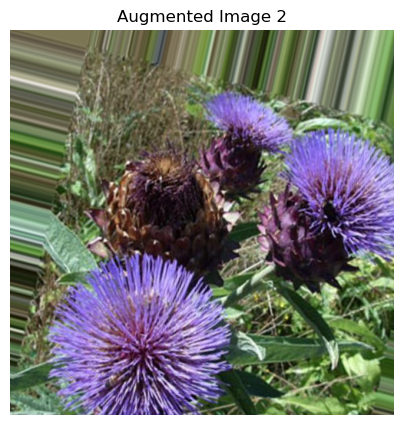

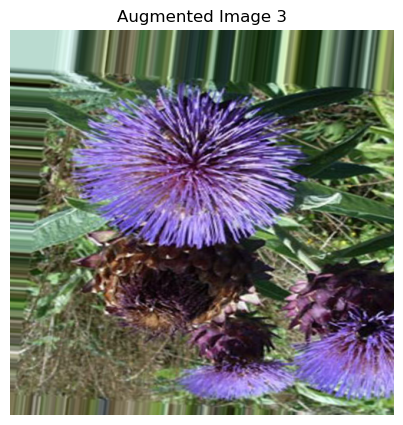

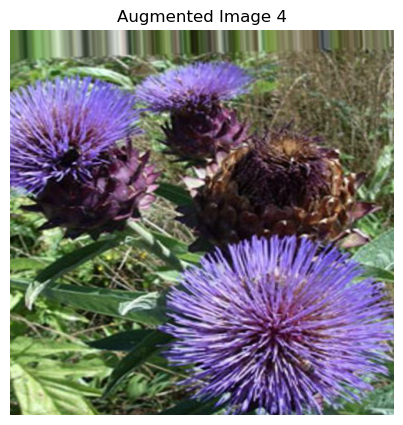

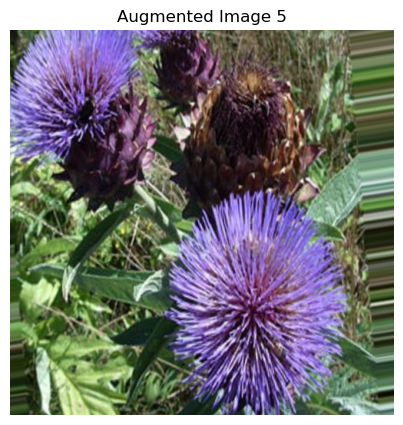

In [11]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

# Directory containing the flower images
image_folder = '102flowers'

# Get a list of all image file paths in the directory
image_files = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith('.jpg')]

# Randomly select an image file
random_image_path = random.choice(image_files)

# Load the randomly selected image
sample_image = Image.open(random_image_path)
sample_image_array = img_to_array(sample_image)

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2, # Shift images vertically by up to 20% of the height
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Zoom in/out on images by up to 20%
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=True,     # Flip images vertically
    fill_mode='nearest'     # Strategy for filling in newly created pixels
)

# Reshape the image array to (1, height, width, channels) for the generator
sample_image_array = np.expand_dims(sample_image_array, axis=0)

# Generate augmented images
num_augmented_images = 5
for i, augmented_image_array in enumerate(datagen.flow(sample_image_array, batch_size=1)):
    augmented_image = Image.fromarray(np.uint8(augmented_image_array[0]))
    plt.figure(figsize=(5, 5))
    plt.imshow(augmented_image)
    plt.axis('off')
    plt.title(f'Augmented Image {i+1}')
    plt.show()
    if i + 1 == num_augmented_images:
        break  # Stop after generating the specified number of augmented images
